### Assignment 3

#### Question 1: Occupations
##### Import the necessary libraries
##### Import the dataset from the provided URL and assign it to a variable called users
##### Discover the mean age per occupation
##### Discover the Male ratio per occupation and sort it from the most to the least
##### Calculate the minimum and maximum ages for each occupation
##### Calculate the mean age for each combination of occupation and sex
##### Present the percentage of women and men for each occupation

In [2]:
import pandas as pd
import numpy as np

# Import the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|')

# Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)



occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [3]:
# Discover the Male ratio per occupation and sort it from the most to the least
male_ratio_per_occupation = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)
print(male_ratio_per_occupation)



occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [4]:
# Calculate the minimum and maximum ages for each occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_per_occupation)



               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [5]:
# Calculate the mean age for each combination of occupation and sex
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_sex)



occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [6]:
# Present the percentage of women and men for each occupation
gender_counts_per_occupation = users.groupby(['occupation', 'gender']).size().unstack()
gender_percentage_per_occupation = gender_counts_per_occupation.div(gender_counts_per_occupation.sum(axis=1), axis=0) * 100
print(gender_percentage_per_occupation)


gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


### Question 2: Euro Teams
##### Import the necessary libraries
##### Import the dataset from the provided URL and assign it to a variable called euro12
##### Select only the Goal column
##### Count the number of teams that participated in Euro2012
##### Count the number of columns
##### View the columns Team, Yellow Cards, and Red Cards, and assign them to a dataframe called discipline
##### Sort the teams by Red Cards, then by Yellow Cards
##### Calculate the mean Yellow Cards given per team
##### Filter teams that scored more than 6 goals
##### Select teams that start with G
##### Select the first 7 columns
##### Select all columns except the last 3
##### Present only the Shooting Accuracy from England, Italy, and Russia

In [8]:
import pandas as pd

# Import the dataset
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

# Select only the Goal column
goals = euro12['Goals']
print(goals)



0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [9]:
# Count the number of teams participated in Euro2012
num_teams = euro12['Team'].nunique()
print(num_teams)



16


In [10]:
# Count the number of columns in the dataset
num_columns = euro12.shape[1]
print(num_columns)



35


In [11]:
# View columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)



                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [12]:
# Sort teams by Red Cards, then by Yellow Cards
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sorted_discipline)



                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [13]:
# Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(mean_yellow_cards)

7.4375


In [14]:
# Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(teams_more_than_6_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [15]:
# Select teams that start with G
teams_start_g = euro12[euro12['Team'].str.startswith('G')]
print(teams_start_g)


      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [16]:
# Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [17]:
# Select all columns except the last 3
all_except_last_3_columns = euro12.iloc[:, :-3]
print(all_except_last_3_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [18]:
# Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


#### Question 3: Housing
##### Import the necessary libraries
##### Create 3 different Series, each of length 100:
##### - The first with random numbers from 1 to 4
##### - The second with random numbers from 1 to 3
##### - The third with random numbers from 10,000 to 30,000
##### Create a DataFrame by joining the Series by column
##### Rename the columns to bedrs, bathrs, price_sqr_meter
##### Create a one-column DataFrame with the values of the 3 Series and assign it to bigcolumn
##### Reindex the DataFrame so it goes from 0 to 299

In [19]:
# Create 3 different Series, each of length 100
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30000, size=100))



In [20]:
# Create a DataFrame by joining the Series by column
housing_df = pd.concat([series1, series2, series3], axis=1)
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(housing_df)



    bedrs  bathrs  price_sqr_meter
0       1       3            19738
1       4       2            29318
2       3       1            12724
3       3       3            16223
4       3       2            28343
..    ...     ...              ...
95      3       1            13048
96      2       2            13147
97      2       2            25321
98      4       2            26584
99      1       3            29558

[100 rows x 3 columns]


In [21]:
# Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0).to_frame()
bigcolumn.reset_index(drop=True, inplace=True)
print(bigcolumn)

         0
0        1
1        4
2        3
3        3
4        3
..     ...
295  13048
296  13147
297  25321
298  26584
299  29558

[300 rows x 1 columns]


In [22]:
# Reindex the DataFrame so it goes from 0 to 299
bigcolumn_reindexed = bigcolumn.reindex(range(300))
print(bigcolumn_reindexed)


         0
0        1
1        4
2        3
3        3
4        3
..     ...
295  13048
296  13147
297  25321
298  26584
299  29558

[300 rows x 1 columns]


#### Question 4: Wind Statistics
##### Import the necessary libraries
##### Import the dataset from the file wind.txt
##### Assign it to a variable called data and replace the first 3 columns with a proper datetime index
##### Fix any incorrect years (e.g., year 2061) and apply the function 
##### Set the right dates as the index
##### Compute missing values for each location over the entire record
##### Compute non-missing values in total
##### Calculate the mean windspeeds across all locations and times
##### Create a DataFrame loc_stats with min, max, mean, and standard deviations of the windspeeds for each location
##### Create a DataFrame day_stats with min, max, mean, and standard deviations of the windspeeds across all locations for each day
##### Find the average windspeed in January for each location
##### Downsample the record to a yearly frequency for each location
##### Downsample the record to a monthly frequency for each location
##### Downsample the record to a weekly frequency for each location
##### Calculate min, max, mean, and standard deviations of the windspeeds across all locations for each week for the first 52 weeks

In [38]:
import pandas as pd
import numpy as np

# Import the dataset
path = 'C:/Users/srikr/OneDrive/Desktop/DataProgrammmingAssignment3Datas/wind.txt'
data = pd.read_csv(path, delim_whitespace=True)


data.columns = data.columns.str.strip()

In [39]:
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [40]:
# Assign it to a variable called data and replace the first 3 columns by a proper datetime index
data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data = data.set_index('date')
data = data.drop(columns=['Yr', 'Mo', 'Dy'])

In [41]:
# Fix incorrect years
def fix_year(x):
    year = x.year - 100 if x.year > 2060 else x.year
    return pd.Timestamp(year, x.month, x.day)

data.index = data.index.map(fix_year)

In [42]:
# Compute missing values for each location over the entire record
missing_values_per_location = data.isna().sum()
print(missing_values_per_location)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [43]:
# Compute non-missing values in total
non_missing_values_total = data.notna().sum().sum()
print(non_missing_values_total)

78857


In [44]:
# Calculate the mean windspeeds across all locations and times
mean_windspeed_all = data.mean().mean()
print(mean_windspeed_all)

10.227982360836938


In [45]:
# Create a DataFrame loc_stats with min, max, mean, and standard deviations of the windspeeds for each location
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
print(loc_stats)

      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [46]:
# Create a DataFrame day_stats with min, max, mean, and standard deviations of the windspeeds across all locations for each day
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(day_stats)

             min    max       mean       std
date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [47]:
# Find the average windspeed in January for each location
january_data = data[data.index.month == 1]
average_windspeed_january = january_data.groupby(january_data.index.year).mean().mean()
print(average_windspeed_january)

RPT    14.847314
VAL    12.912900
ROS    13.299624
KIL     7.199498
SHA    11.665601
BIR     8.054839
DUB    11.819355
CLA     9.511569
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [48]:
# Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()
print(yearly_data)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [49]:
# Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print(monthly_data)

                  RPT        VAL        ROS       KIL        SHA        BIR  \
date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [50]:
# Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()
print(weekly_data)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [51]:
# Calculate min, max, mean, and standard deviations of the windspeeds across all locations for each week for the first 52 weeks
first_52_weeks_data = weekly_data.iloc[:52]
weekly_stats = first_52_weeks_data.agg(['min', 'max', 'mean', 'std'])
print(weekly_stats)


            RPT        VAL        ROS        KIL        SHA        BIR  \
min    4.202857   4.255714   6.738571   3.300000   6.112857   2.715714   
max   19.880000  16.417143  18.225714  12.720000  17.432857  14.828571   
mean  12.316163  10.436978  11.296667   6.998690  10.930691   7.810330   
std    3.419077   2.900003   2.789210   2.091987   2.674869   2.426344   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    3.964286   4.257143   4.501429   6.031429   5.875714   5.737143  
max   15.565714  15.160000  14.480000  16.461429  21.832857  23.641429  
mean   9.764986   8.908732   8.732106   9.914712  13.658352  13.723933  
std    2.850023   2.447832   2.412421   2.595592   3.640914   3.583555  


#### Question 5
##### Import the necessary libraries


In [84]:
import pandas as pd


#### Step 2: Import the dataset from this address
#### Step 3: Assign it to a variable called chipo

In [85]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

In [86]:
# See the first 10 entries
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [87]:
# what is the no of ovservations in the dataset?

num_observations = chipo.shape[0]
print(f'Number of observations: {num_observations}')


Number of observations: 4622


In [88]:
# what is the number of the columns in the dataset?

num_columns = chipo.shape[1]
print(f'Number of columns: {num_columns}')


Number of columns: 5


In [89]:
# print the name of all the columns
print(f'Column names: {chipo.columns.tolist()}')


Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [90]:
# How is the dataset indexed?
print(f'Index: {chipo.index}')


Index: RangeIndex(start=0, stop=4622, step=1)


In [91]:
# Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name').quantity.sum().idxmax()
print(f'Most-ordered item: {most_ordered_item}')


Most-ordered item: Chicken Bowl


In [92]:
# For the most-ordered ite, How many items were ordered?

most_ordered_quantity = chipo.groupby('item_name').quantity.sum().max()
print(f'Quantity of most-ordered item: {most_ordered_quantity}')


Quantity of most-ordered item: 761


In [93]:
most_ordered_choice_description = chipo.groupby('choice_description').quantity.sum().idxmax()
print(f'Most ordered item in choice_description: {most_ordered_choice_description}')

Most ordered item in choice_description: [Diet Coke]


In [94]:
# How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print(f'Total items ordered: {total_items_ordered}')


Total items ordered: 4972


In [95]:
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Check the item price type
print(f'Item price type : {chipo["item_price"].dtype}')

# Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Check the item price type again
print(f'Item price type after : {chipo["item_price"].dtype}')


Item price type : float64
Item price type after : float64


In [97]:
#  How much was the revenue for the period in the dataset?

chipo['total_price'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['total_price'].sum()
print(f'Total revenue: ${total_revenue:.2f}')


Total revenue: $39237.02


In [98]:
# How many orders were made in the period?

num_orders = chipo['order_id'].nunique()
print(f'Number of orders: {num_orders}')


Number of orders: 1834


In [99]:
# What is the average revenue amount per order?

avg_revenue_per_order = total_revenue / num_orders
print(f'Average revenue per order: ${avg_revenue_per_order:.2f}')


Average revenue per order: $21.39


In [100]:
# How many different items are sold?

num_different_items = chipo['item_name'].nunique()
print(f'Number of different items sold: {num_different_items}')


Number of different items sold: 50


#### Question 6
###### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.


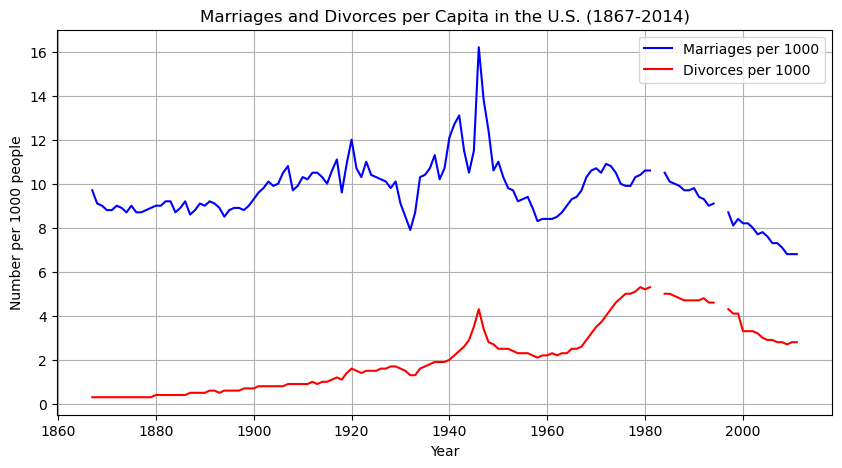

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset
path = 'C:/Users/srikr/OneDrive/Desktop/DataProgrammmingAssignment3Datas/us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(path)

# line plot
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color='blue')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color='red')
plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.grid(True)
plt.show()


#### Question 7
##### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
###### Don't forget to label your axes!

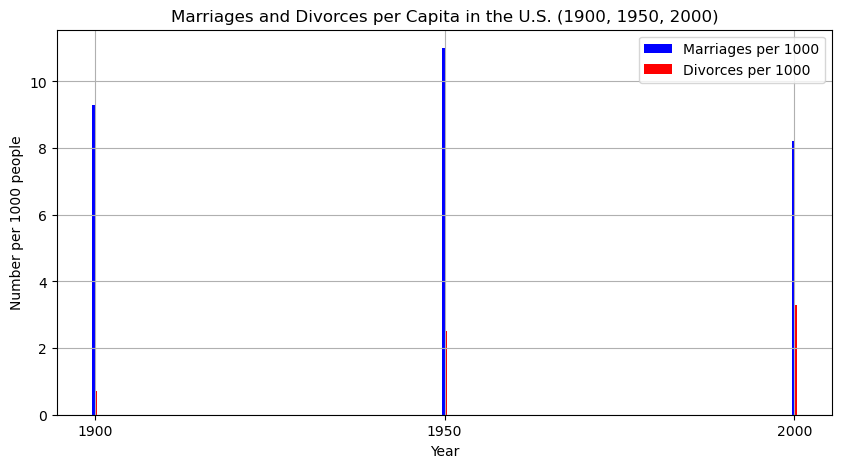

In [104]:
import pandas as pd
import matplotlib.pyplot as plt


path = 'C:/Users/srikr/OneDrive/Desktop/DataProgrammmingAssignment3Datas/us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(path)

# Filtering the data for the years 1900, 1950, and 2000
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

# Bar chart
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = filtered_data['Year']

bar1 = plt.bar(index - bar_width/2, filtered_data['Marriages_per_1000'], bar_width, label='Marriages per 1000', color='blue')
bar2 = plt.bar(index + bar_width/2, filtered_data['Divorces_per_1000'], bar_width, label='Divorces per 1000', color='red')

plt.xlabel('Year')
plt.ylabel('Number per 1000 people')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(index)
plt.legend()
plt.grid(True)
plt.show()

#### Question 8
##### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
##### the actors by their kill count and label each bar with the corresponding actor's name.
##### Don't forget to label your axes!

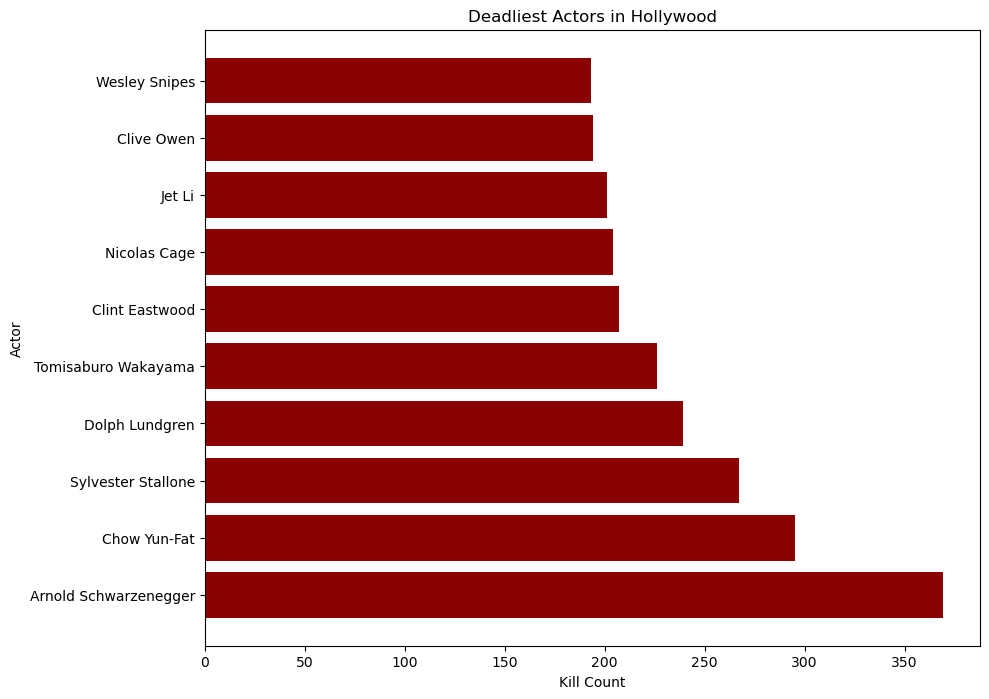

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\srikr\Downloads\actor_kill_counts.csv")

# Sort the data by kill count in descending order
data_sorted = data.sort_values(by='Count', ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(data_sorted['Actor'], data_sorted['Count'], color='darkred')

# Labeling the axes
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Display the plot
plt.show()

#### Question 9
##### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
##### Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

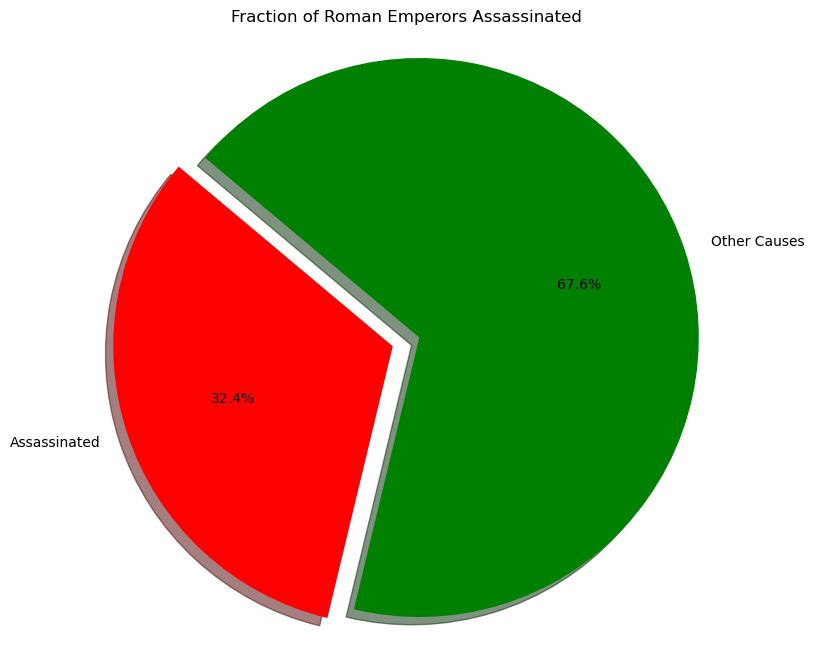

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the provided path
file_path = r"C:\Users\srikr\Downloads\roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Count the number of emperors who were assassinated
assassinated = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]

# Calculate the total number of emperors
total_emperors = data.shape[0]

# Calculate the number of emperors who died of other causes
other_causes = total_emperors - assassinated

# Data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated, other_causes]
colors = ['red', 'green'] 
explode = (0.1, 0)  

# Create the pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Ensure that the pie is drawn as a circle
plt.axis('equal')

# Title of the pie chart
plt.title('Fraction of Roman Emperors Assassinated')

# Display the pie chart
plt.show()

# Question10
##### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Label the axes and color each dot according to its year.

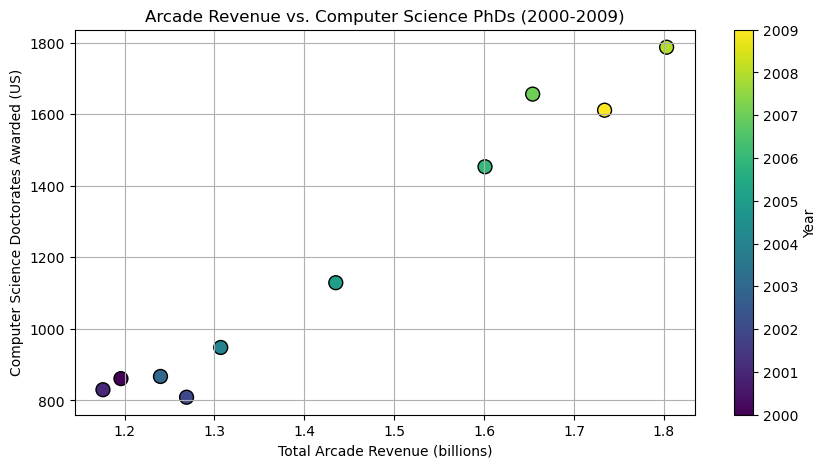

In [115]:
import pandas as pd
import matplotlib.pyplot as plt


path = 'C:/Users/srikr/OneDrive/Desktop/DataProgrammmingAssignment3Datas/arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(path)

# scatter plot
plt.figure(figsize=(10, 5))
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
                      c=data['Year'], cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Arcade Revenue vs. Computer Science PhDs (2000-2009)')
plt.colorbar(scatter, label='Year')
plt.grid(True)
plt.show()
